In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import argrelmax, argrelextrema
from scipy.signal import find_peaks
from scipy.fft import fft

from parlitz import Parlitz

In [13]:
t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 8000, t_step)
keep = int(t_last / t_step)
x = 0.5
y = 1
z = 0

par = x,y,z
k = 20
omega = 0.95
delta = 0.2
alpha = 2.5
count = 6
lilie = Parlitz(par, t, keep, alpha, omega, delta)

# Hysteresis 

In [4]:
x0 = []
x1 = []
y0 = []
y1 = []
z0 = []
z1 = []

hys_alpha = np.arange(0.2, 4, 0.1)
rev_hys_alpha = list(reversed(hys_alpha))

for i in hys_alpha:
    x0.append(Parlitz(par, t, keep, alpha, i, delta).x_solv()[-keep])
    y0.append(Parlitz(par, t, keep,  alpha, i, delta).y_solv()[-keep])
    z0.append(Parlitz(par, t, keep,  alpha, i, delta).z_solv()[-keep])

for k in rev_hys_alpha:
    x1.append(Parlitz(par, t, keep,  alpha, i, delta).x_solv()[-keep])
    y1.append(Parlitz(par, t, keep,  alpha, i, delta).y_solv()[-keep])
    z1.append(Parlitz(par, t, keep,  alpha, i, delta).z_solv()[-keep])
    
hys_omega = [np.sqrt(i) for i in hys_alpha]

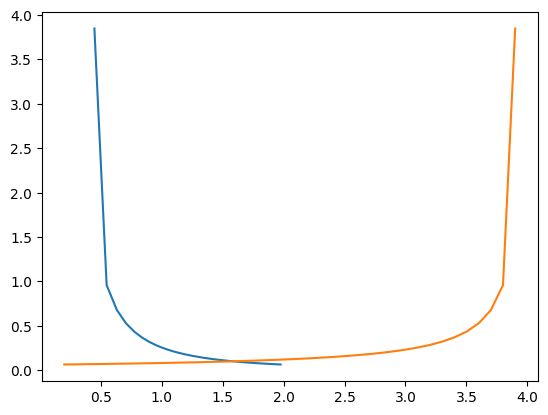

In [6]:
hys_amp = []
for i in range(len(z0)):
    part = x0[i], y0[i],z0[i]
    hys_amp.append(np.mean(Parlitz(part, t, keep, alpha, hys_alpha[i], delta).find_peaks_max()[1][1]['peak_heights'][-10:]))

rev_his_amp = []
for i in range(len(z0)):
    party = x1[i], y1[i], z1[i]
    rev_his_amp.append(np.mean(Parlitz(party, t, keep, alpha, rev_hys_alpha[i], delta).find_peaks_max()[1][1]['peak_heights'][-10:]))


plt.plot(hys_omega, hys_amp)
plt.plot(hys_alpha, rev_his_amp)
plt.show()

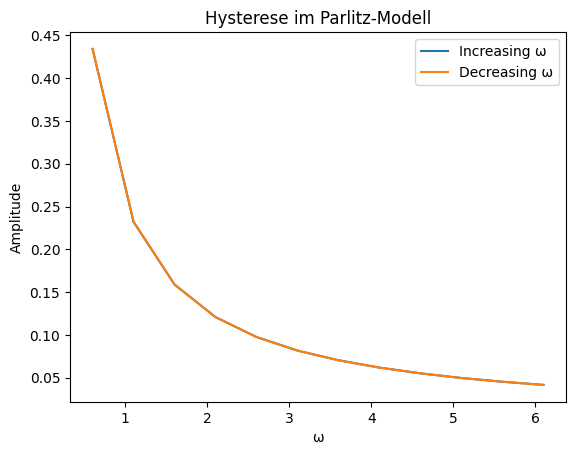

In [15]:
omegas = np.arange(0.6, 6.5, 0.5)
rev_omegas = list(reversed(omegas))
par = [0.5, 1, 0]
state = par

fwd_amp = []
for omega in omegas:
    model = Parlitz(state, t, keep, alpha, omega, delta)
    sol = model.duffvdpsolver()
    state = sol[-1]
    amp = np.mean(Parlitz(state, t, keep, alpha, omega, delta).find_peaks_max()[1][1]['peak_heights'][-10:])
    fwd_amp.append(amp)

state = state  # Wichtig: Weiterverwenden des letzten Zustands
bwd_amp = []
for omega in rev_omegas:
    model = Parlitz(state, t, keep, alpha, omega, delta)
    sol = model.duffvdpsolver()
    state = sol[-1]
    amp = np.mean(Parlitz(state, t, keep, alpha, omega, delta).find_peaks_max()[1][1]['peak_heights'][-10:])
    bwd_amp.append(amp)

plt.plot(omegas, fwd_amp, label="Increasing ω")
plt.plot(list(reversed(omegas)), bwd_amp, label="Decreasing ω")
plt.xlabel("ω")
plt.ylabel("Amplitude")
plt.title("Hysterese im Parlitz-Modell")
plt.legend()
plt.show()
